# Reference


<img src="https://bimage.interpark.com/partner/goods_image/5/1/9/3/328045193g.jpg" width="200px"></img> <img src="https://bimage.interpark.com/partner/goods_image/4/9/7/7/332334977g.jpg" width="200px"></img> 

# 논리 회귀와 의사결정나무

## 목차

- 논리 회귀 실습
- 분류 평가 지표
- 의사결정나무 실습

# 논리 회귀

선형 회귀 방식을 이용한 이진 분류 알고리즘입니다.

## 선형 회귀로 풀기 힘든 문제의 등장

시험 전 날 공부한 시간을 가지고 해당 과목의 이수 여부(Pass or fail)를 예측하는 문제

- Fail(미이수): 0
- Pass(이수): 1

선형 회귀로 풀었을 때,

<img src="https://i.imgur.com/rDH5GyN.png" width="600px">

논리 회귀로 풀었을 때,

<img src="https://i.imgur.com/1dcZXYk.png" width="600px">

## Sigmoid 함수

<img src="https://i.imgur.com/4NItBv6.png" width="500px">

x(입력)가 음수 방향으로 갈 수록 y(출력)가 0에 가까워지고,

x(입력)가 양수 방향으로 갈 수록 y(출력)가 1에 가까워진다!

즉, 시그모이드 함수를 통과하면 0 에서 1 사이 값이 나온다!

> 실제 많은 자연, 사회현상에서는 특정 변수에 대한 확률값이 선형이 아닌 S 커브 형태를 따르는 경우가 많다고 합니다. 이러한 S-커브를 함수로 표현해낸 것이 바로 로지스틱 함수(Logistic function)입니다. 딥러닝에서는 시그모이드 함수(Sigmoid function)라고 불립니다.

# 논리 회귀 실습

## 유방암 데이터셋을 이용한 실습

### 데이터셋 로드

- 반지름 radius (mean of distances from center to points on the perimeter)
- 질감 texture (standard deviation of gray-scale values)
- 둘레 perimeter
- 면적 area
- 평탄성 smoothness (local variation in radius lengths)
- 밀도 compactness (perimeter^2 / area - 1.0)
- 오목함 concavity (severity of concave portions of the contour)
- 오목한 점의 개수 concave points (number of concave portions of the contour)
- 대칭 symmetry
- fractal dimension (“coastline approximation” - 1)
- Target: WDBC-Malignant(악성), WDBC-Benign(양성)

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 데이터 시각화

In [2]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


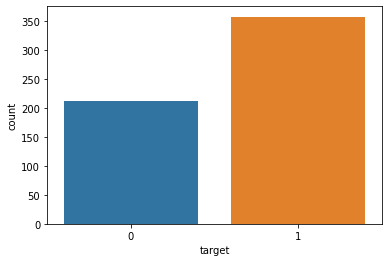

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['target'])
plt.show()

### 데이터 전처리

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df.drop(columns=['target']))

scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

### 데이터셋 분할

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled, df['target'], random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(426, 30) (426,)
(143, 30) (143,)


### 모델 정의, 학습

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 검증

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred)

0.9790209790209791

# 분류 평가 지표

내가 만든 분류기가 얼마나 잘 동작하는지 알아봅시다.

## Confusion Matrix

<img src="https://i.imgur.com/HkWURzS.jpg" width="600px">

https://skappal7.wordpress.com/2018/08/15/understanding-confusion-matrix/

**거꾸로 읽읍시다!**

모델이 Positive/Negative 예측했고, 실제로 True/False 인 경우

1. True Positive (TP): 모델이 임신했다고 예측했고, 실제로 임신한 경우 (참)
2. True Negative (TN): 모델이 임신하지 않았다고 예측했고, 실제로 임신하지 않은 경우 (참)
3. False Positive (FP): 모델이 임신했다고 *예측했지만*, 실제로 임신하지 않은 경우 (거짓)
4. False Negative (FN): 모델이 임신하지 않았다고 *예측했지만*, 실제로 임신한 경우 (거짓)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

cm

array([[60,  1],
       [ 2, 80]])

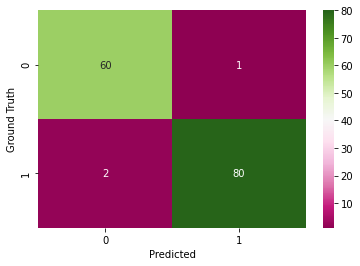

In [ ]:
sns.heatmap(cm, annot=True, cmap='PiYG')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

In [ ]:
TN, FP, FN, TP = cm.flatten()

print(TP, TN, FP, FN)

80 60 1 2


## 정확도 Accuracy

얼마나 정답을 잘 예측했는가

Accruacy = (TP + TN) / Total

In [ ]:
(TP + TN) / (TP + TN + FP + FN)

0.9790209790209791

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.9790209790209791

## 오류율 Error Rate

얼마나 틀렸는가

ER = (FP + FN) / Total

In [ ]:
(FP + FN) / (TP + TN + FP + FN)

0.02097902097902098

## 정밀도 Precision

모델이 임신했다고 예측한 것 중에서, 진짜 임신한 경우는 얼마나 되는가

모델이 암이라고 예측한 것 중에서, 진짜 암인 경우는 얼마나 되는가

모델이 스팸 메일이라고 분류한 것 중에서, 진짜 스팸 메일인 경우는 얼마나 되는가
- 중요: 스팸 메일로 분류했는데 중요 메일인 경우

Precision = TP / Predicted yes

In [ ]:
TP / (TP + FP)

0.9876543209876543

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_val, y_pred)

0.9876543209876543

## 재현율 Recall

실제 임신했는데, 모델이 임신이라고 예측한 경우는 얼마나 되는가

실제 암인데, 모델이 암이라고 예측한 경우는 얼마나 되는가

* 중요: 암에 걸렸는데 암이 아니라고 예측해버렸을 경우

실제 비가 오는데, 모델이 비가 온다고 예측한 경우는 얼마나 되는가

* 중요: 비가 오는데 비가 안온다고 예측해버렸을 경우 <img src="https://i.imgur.com/Zq10Chy.png" width="25px">

Recall = TP / Actual yes

In [ ]:
TP / (FN + TP)

0.975609756097561

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_val, y_pred)

0.975609756097561

## F1 Score

정밀도와 재현율의 균형도(가중 평균)

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_val, y_pred)

0.9815950920245398

# 의사 결정 나무

Decision Tree 스무 고개

<img src="https://i.imgur.com/XHGtbzq.png" width="500px">

## 유방암 데이터셋을 이용한 실습

### 모델 정의, 학습

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 검증

In [9]:
y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred)

0.958041958041958

### 의사결정나무 시각화

In [10]:
!pip install -q dtreeviz

     |████████████████████████████████| 61 kB 534 kB/s 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


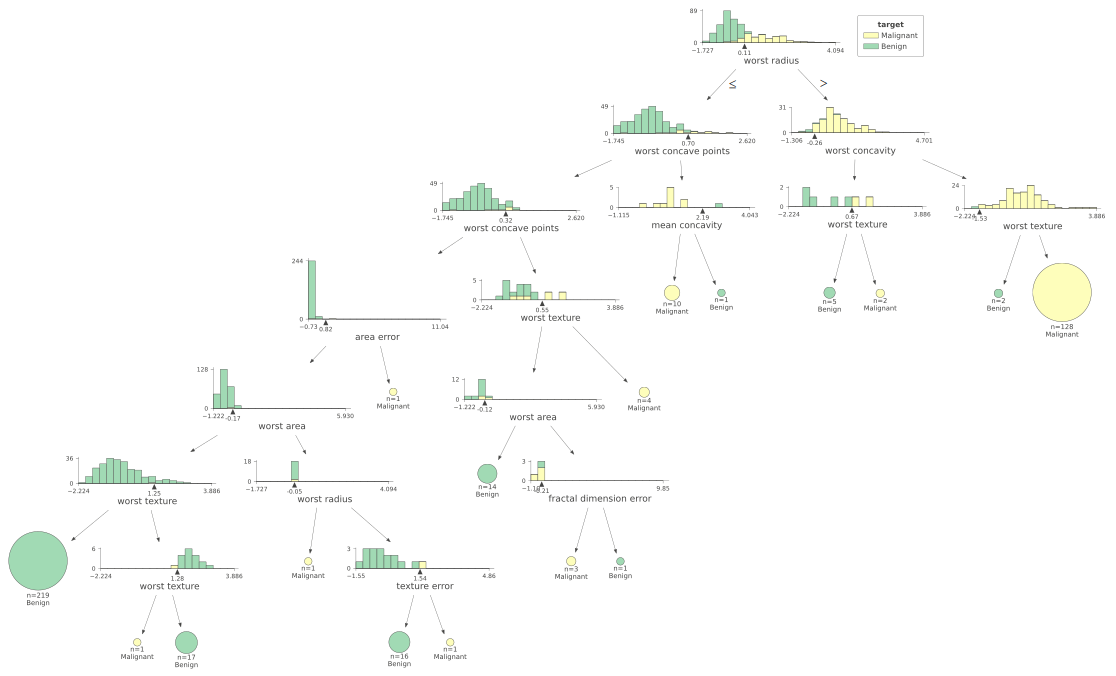

In [11]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model, 
  x_train,
  y_train,
  target_name='target',
  feature_names=data['feature_names'],
  class_names=['Malignant', 'Benign'])

viz

### Feature Importance

의사결정나무가 학습할 때 중요하게 생각한 특징들을 중요도 순으로 나열할 수 있습니다.

In [12]:
features = pd.DataFrame(
    model.feature_importances_,
    index=data['feature_names'],
    columns=['importance']
).sort_values('importance', ascending=False)

features

,importance
worst radius,0.740658
worst concave points,0.101098
worst texture,0.068389
worst concavity,0.033285
worst area,0.019914
area error,0.009980
texture error,0.009655
mean concavity,0.009326
fractal dimension error,0.007694
mean radius,0.000000


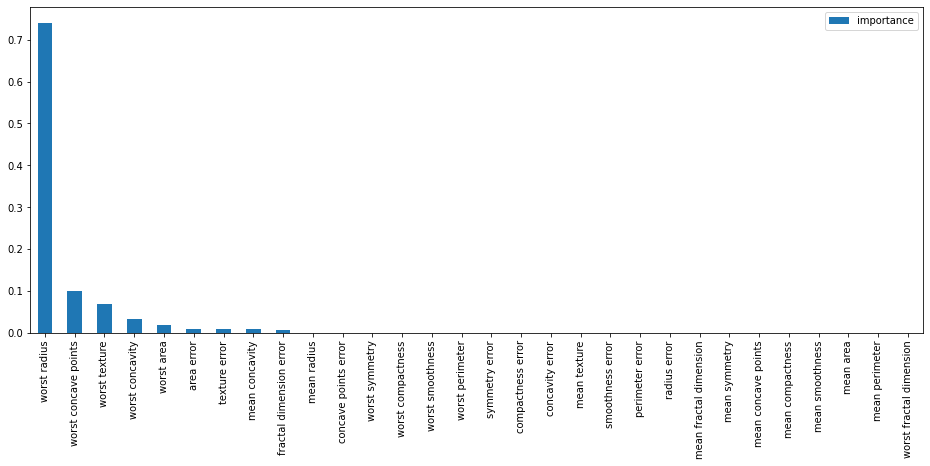

In [13]:
features.plot.bar(figsize=(16, 6))
plt.show()